# Ultimate Data Analysis Interview Challenge.

### Part I. Exploratory Data Analysis

Let's load some necessary modules.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

Now that we have the necessary modules, we can take a look at the data.

In [4]:
#Loading the data
df = pd.read_json(r'C:\Users\songs\Desktop\Springboard Files\Springboard-Files\Take-home Challenges\ultimate_challenge\logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
#Examining the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Okay, so we only have one column that's already in datetime format. First, let's resample the data by 15 minute intervals as the question had asked.

In [37]:
df_15 = df.set_index('login_time')
df_15['count'] = 1
df_15 = df_15.resample('15min').sum()
df_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Now that we have this, we can look for some patterns in the login time. For example, we can look at the fluctuations that exist in **hours of the day.**

In [29]:
#Making a copy of df_15
df_day = df_15

#Isolating each hour of the day and grouping by it
df_day['hour'] = df_15.index.hour
hourly_average = df_day.groupby('hour').mean()['count']
hourly_average

hour
0     14.688725
1     15.482843
2     14.215686
3     11.840686
4     12.338235
5      7.218137
6      2.789216
7      1.997549
8      2.004902
9      3.742647
10     7.509804
11    14.213235
12    12.166667
13     8.850490
14     8.397059
15     7.446078
16     6.941176
17     6.333333
18     7.303922
19     8.007426
20    10.056373
21    13.781863
22    16.193627
23    14.848039
Name: count, dtype: float64

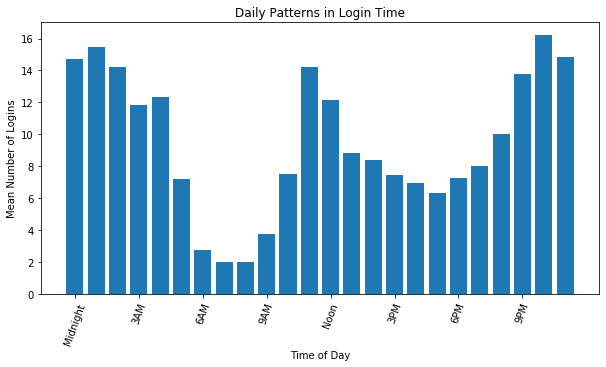

In [30]:
#Plotting
plt.figure(figsize=(10,5))
plt.bar(range(24),hourly_average)
plt.xticks([0,3,6,9,12,15,18,21],['Midnight','3AM','6AM','9AM','Noon','3PM','6PM','9PM'],rotation=70)
plt.xlabel('Time of Day')
plt.ylabel('Mean Number of Logins')
plt.title('Daily Patterns in Login Time')
plt.show()

As is a bit unexpected of a transportation company, the peaks of login time do not correlate with rush hours (7-9AM and 4-6PM). In fact, those points see lower numbers of logins. Instead, the company sees its peak logins near lunch time and late night. The hour with the most average logins is 10PM, with an average of 16.2.

Next, let's look at the trends within each day of the week.

In [45]:
#Making a copy of df_15
df_week = df_15

#Isolating each hour of the day and grouping by it
df_week['day'] = df_15.index.weekday
day_average = df_week.groupby('day').mean()['count']
day_average

day
0     6.213380
1     6.895833
2     7.692708
3     8.794118
4    10.561111
5    13.456250
6    12.615972
Name: count, dtype: float64

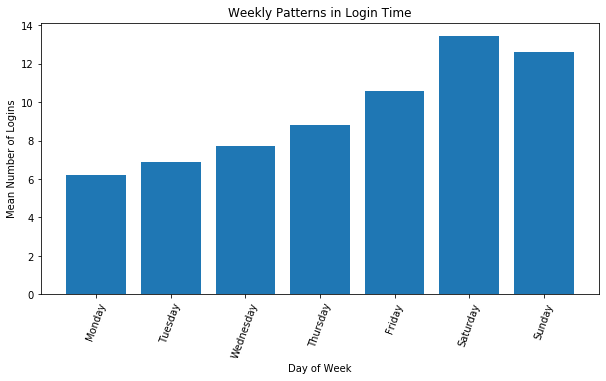

In [46]:
plt.figure(figsize=(10,5))
plt.bar(day_average.index,day_average)
plt.xticks(day_average.index,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],rotation=70)
plt.xlabel('Day of Week')
plt.ylabel('Mean Number of Logins')
plt.title('Weekly Patterns in Login Time')
plt.show()

It appears that the number of logins start off low on Monday and gradually increases over the course of the week. As can be seen, weekends logins are greater than weekday logins.

Next we'll look at the monthly pattern.

In [31]:
#Making a copy of df_15
df_month = df_15

#Isolating each hour of the day and grouping by it
df_month['day'] = df_15.index.day
daily_average = df_month.groupby('day').mean()['count']
daily_average

day
1     10.506579
2      7.927083
3      9.049479
4     10.513021
5      8.393229
6      8.544271
7     10.432292
8     10.466146
9      7.375000
10     8.585938
11    10.059896
12     9.411458
13     8.299451
14    11.895833
15    11.565972
16     7.690972
17    10.569444
18    10.225694
19     9.927083
20    10.017361
21    12.107639
22    12.177083
23     7.753472
24     8.048611
25     8.152778
26     7.555556
27     9.496528
28    12.291667
29    11.442708
30     7.369792
31     8.203125
Name: count, dtype: float64

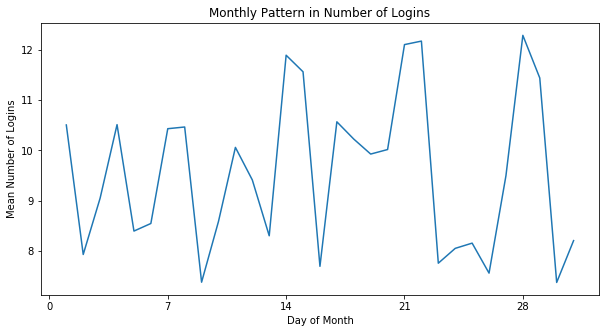

In [34]:
#Plotting
plt.figure(figsize=(10,5))
plt.plot(daily_average)
plt.xticks([0,7,14,21,28])
plt.xlabel('Day of Month')
plt.ylabel('Mean Number of Logins')
plt.title('Monthly Pattern in Number of Logins')
plt.show()

A weekly pattern emerges: the number of logins start off high, then drops by the second or third day of the week, peaks again by the 4th day, drops again by the 5th or 6th day, and rises to another peak by the start of the next week. This is somewhat different from the weekly analysis we did earlier.

Generally, it appears that the mean number of logins stays constant over the passage of the month, with the higher peaks conteracted by lower drops.

Next, we'll look at the whole course.

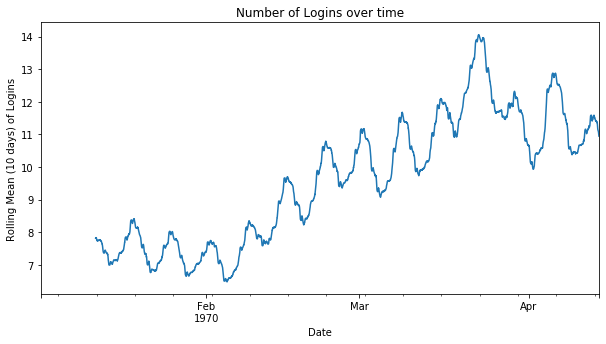

In [59]:
plt.figure(figsize=(10,5))
df_15['count'].rolling(960).mean().plot()
plt.xlabel('Date')
plt.ylabel('Rolling Mean (10 days) of Logins')
plt.title('Number of Logins over time')
plt.show()

4 times 15 is an hour, and 24 times an hour is a day. Thus, a period of 960 gives us a rolling mean of 10 days. I used a rolling mean because 1) It gives us more information about how the variable changes over time and specific patterns and breaks from the pattern compared to a bar plot, 2) There's a lot of points, and it'd be ineffective to plot them all.

Generally, there appears to be a seasonal pattern in the number of logins and an upward trend. There is a peak near the beginning of April, which could be looked at further. The actual peak might be earlier than suggested on the graph, because rolling mean has a tendency to push events back.